In [8]:
from kandinsky2 import get_kandinsky2
import os

import torch
# # Set these environment variables before importing kandinsky2
# os.environ["KANDINSKY2_1_REPO"] = "kandinsky-community/kandinsky-2-1"
# os.environ["KANDINSKY2_1_PRIOR_REPO"] = "kandinsky-community/kandinsky-2-1-prior"

import torch
from diffusers import KandinskyV22PriorPipeline, KandinskyV22Pipeline
from vit_prisma.models.base_vit import HookedViT

import torch



In [ ]:
from kandinsky2 import get_kandinsky2

cache_dir = "/network/scratch/s/sonia.joseph/diffusion",


model = get_kandinsky2('cuda', task_type='impainting', cache_dir=cache_dir, model_version='2.1', use_flash_attention=False)

UnboundLocalError: local variable 'config_file_url' referenced before assignment

In [54]:
# def generate_with_hooked_encoder(
#     prompt: str,
#     negative_prompt: str = None,
#     num_inference_steps: int = 25,
#     device: str = "cuda",
#     dtype: torch.dtype = torch.float32,
# ):
# Load the prior pipeline

dtype = torch.float32
device = 'cuda'

prior = KandinskyV21PriorPipeline.from_pretrained(
    "ai-forever/kandinsky-2-1-prior",
    cache_dir = "/network/scratch/s/sonia.joseph/diffusion",
    torch_dtype=dtype
).to(device)

# Load and insert our hooked vision encoder
hooked_vision = HookedViT.from_pretrained(
    'kandinsky', 
    is_timm=False, 
    is_clip=True, 
    fold_ln=False, 
    center_writing_weights=False
).to(device).to(dtype)

print(prior)




NameError: name 'KandinskyV21PriorPipeline' is not defined

In [51]:
prior.image_encoder

CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1024)
    )
    (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-23): 24 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=1024, out_featur

In [52]:
# # Replace the vision encoder in the prior pipeline
# old_config = prior.image_encoder.config
# prior.image_encoder = hooked_vision
# prior.image_encoder.config = old_config

# Load the main pipeline
pipeline = KandinskyV22Pipeline.from_pretrained(
    "kandinsky-community/kandinsky-2-1-decoder",
    cache_dir = "/network/scratch/s/sonia.joseph/diffusion",
    torch_dtype=dtype,
).to(device)


Couldn't connect to the Hub: 401 Client Error. (Request ID: Root=1-67562ba7-540f9a1031c9c93a2cef7a39;fc96d103-34c4-41ab-95cf-82c6592d9eb4)

Repository Not Found for url: https://huggingface.co/api/models/kandinsky-community/kandinsky-2-1-decoder.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password..
Will try to load from local cache.


OSError: Cannot load model kandinsky-community/kandinsky-2-1-decoder: model is not cached locally and an error occured while trying to fetch metadata from the Hub. Please check out the root cause in the stacktrace above.

In [39]:
# Load and preprocess the input image
import torch
from diffusers import KandinskyV22PriorPipeline, KandinskyV22Pipeline
from vit_prisma.models.base_vit import HookedViT
from transformers import CLIPVisionModelWithProjection
from PIL import Image
import requests
from torchvision import transforms

image_url = 'https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'

image = Image.open(requests.get(image_url, stream=True).raw)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                        std=[0.26862954, 0.26130258, 0.27577711])
])
input_image = preprocess(image).unsqueeze(0).to(device).to(dtype)

In [42]:
output = hooked_vision(input_image)
output.shape

torch.Size([1, 768])

In [46]:
prior

KandinskyV22PriorPipeline {
  "_class_name": "KandinskyV22PriorPipeline",
  "_diffusers_version": "0.24.0.dev0",
  "_name_or_path": "kandinsky-community/kandinsky-2-2-prior",
  "image_encoder": [
    "vit_prisma",
    "HookedViT"
  ],
  "image_processor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "prior": [
    "diffusers",
    "PriorTransformer"
  ],
  "scheduler": [
    "diffusers",
    "UnCLIPScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ]
}

In [45]:
# Generate image embeddings
prompt = "a painting of cat hd"
negative_prompt="low quality, bad, blurry"

num_inference_steps = 25

generator = torch.Generator(device).manual_seed(42)
image_embeds, negative_image_embeds = prior(
    img_prompt=output,
    negative_prompt=None,
    generator=generator,
    num_inference_steps=num_inference_steps,
).to_tuple()

# # Generate the image
# image = pipeline(
#     image_embeds=image_embeds,
#     negative_image_embeds=negative_image_embeds,
#     generator=generator,
#     num_inference_steps=num_inference_steps,
# ).images[0]

TypeError: KandinskyV22PriorPipeline.__call__() got an unexpected keyword argument 'img_prompt'

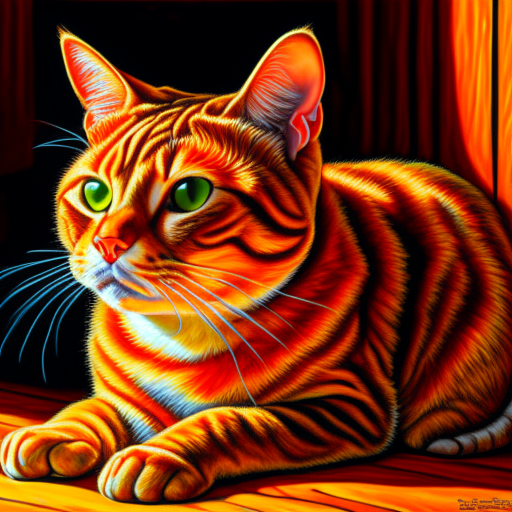

In [32]:
image

In [ ]:
image = generate_with_hooked_encoder("A painting of a beautiful sunset over the ocean")

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

(…)rior/diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

image_encoder/model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

HF config: namespace(_name_or_path='kandinsky-community/kandinsky-2-1-prior', architectures=['CLIPVisionModelWithProjection'], attention_dropout=0.0, dropout=0.0, hidden_act='quick_gelu', hidden_size=1024, image_size=224, initializer_factor=1.0, initializer_range=0.02, intermediate_size=4096, layer_norm_eps=1e-05, model_type='clip_vision_model', num_attention_heads=16, num_channels=3, num_hidden_layers=24, patch_size=14, projection_dim=768, transformers_version='4.39.3')
Official model name kandinsky
Converting Kandinsky weights
Convering Kandinsky Clip weights
Class embedding shape: torch.Size([1024])
Position embedding shape: torch.Size([257, 1024])
Patch embedding shape: torch.Size([1024, 3, 14, 14])
visual projection shape torch.Size([768, 1024])
doing number of layers 24
Loaded pretrained model kandinsky into HookedTransformer


model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

movq/diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

AttributeError: 'HookedViT' object has no attribute 'config'

: 

In [ ]:
from vit_prisma.models.base_vit import HookedViT
hooked_model = HookedViT.from_pretrained('kandinsky', is_timm=False, is_clip=True, fold_ln=False, center_writing_weights=False) # in future, do all models


HF config: namespace(_name_or_path='kandinsky-community/kandinsky-2-1-prior', architectures=['CLIPVisionModelWithProjection'], attention_dropout=0.0, dropout=0.0, hidden_act='quick_gelu', hidden_size=1024, image_size=224, initializer_factor=1.0, initializer_range=0.02, intermediate_size=4096, layer_norm_eps=1e-05, model_type='clip_vision_model', num_attention_heads=16, num_channels=3, num_hidden_layers=24, patch_size=14, projection_dim=768, transformers_version='4.39.3')
Official model name kandinsky
Converting Kandinsky weights
Convering Kandinsky Clip weights
Class embedding shape: torch.Size([1024])
Position embedding shape: torch.Size([257, 1024])
Patch embedding shape: torch.Size([1024, 3, 14, 14])
visual projection shape torch.Size([768, 1024])
doing number of layers 24
Loaded pretrained model kandinsky into HookedTransformer


: 

In [ ]:
from transformers import CLIPVisionModelWithProjection

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    'kandinsky-community/kandinsky-2-1-prior',
    subfolder='image_encoder',
    torch_dtype=torch.float16,
    cache_dir = '/network/scratch/s/sonia.joseph/diffusion'
).to("cuda")

: 

In [ ]:
image_encoder

NameError: name 'image_encoder' is not defined

: 

In [ ]:
for key in image_encoder.state_dict().keys():
    print(key)

vision_model.embeddings.class_embedding
vision_model.embeddings.patch_embedding.weight
vision_model.embeddings.position_embedding.weight
vision_model.pre_layrnorm.weight
vision_model.pre_layrnorm.bias
vision_model.encoder.layers.0.self_attn.k_proj.weight
vision_model.encoder.layers.0.self_attn.k_proj.bias
vision_model.encoder.layers.0.self_attn.v_proj.weight
vision_model.encoder.layers.0.self_attn.v_proj.bias
vision_model.encoder.layers.0.self_attn.q_proj.weight
vision_model.encoder.layers.0.self_attn.q_proj.bias
vision_model.encoder.layers.0.self_attn.out_proj.weight
vision_model.encoder.layers.0.self_attn.out_proj.bias
vision_model.encoder.layers.0.layer_norm1.weight
vision_model.encoder.layers.0.layer_norm1.bias
vision_model.encoder.layers.0.mlp.fc1.weight
vision_model.encoder.layers.0.mlp.fc1.bias
vision_model.encoder.layers.0.mlp.fc2.weight
vision_model.encoder.layers.0.mlp.fc2.bias
vision_model.encoder.layers.0.layer_norm2.weight
vision_model.encoder.layers.0.layer_norm2.bias
vis

: 

In [ ]:
image_encoder.config

CLIPVisionConfig {
  "_name_or_path": "kandinsky-community/kandinsky-2-1-prior",
  "architectures": [
    "CLIPVisionModelWithProjection"
  ],
  "attention_dropout": 0.0,
  "dropout": 0.0,
  "hidden_act": "quick_gelu",
  "hidden_size": 1024,
  "image_size": 224,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "model_type": "clip_vision_model",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 14,
  "projection_dim": 768,
  "torch_dtype": "float32",
  "transformers_version": "4.39.3"
}

: 

: 

In [ ]:
generate_with_hooked_encoder("a painting of a cat")

: 

: 